In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tickers = ['SPY','TLT']
start = dt.datetime(2008,1,1)
end = dt.datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start,end)

In [3]:
data = data['Adj Close']


In [4]:
portfolio = [.5,.5]


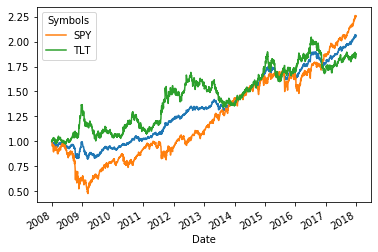

In [5]:
fig,ax = plt.subplots()
((data/data.iloc[0])*portfolio).sum(axis=1).plot(ax=ax)
(data/data.iloc[0]).plot(ax=ax)


The blue line is our portfolio.

we will create a series with the strategy and one with log returns

In [6]:
stategy = ((data/data.iloc[0])*portfolio).sum(axis=1)
log_returns = np.log(stategy/stategy.shift())

Then we can calculate the CAGR.

In [7]:
(stategy.iloc[-1]/stategy.iloc[0])**(1/10)-1

0.07505075523183247

maximum drawdown.

In [8]:
rolling_max = stategy.cummax()
daily_drawdown = stategy/rolling_max - 1
max_drawdown = daily_drawdown.cummin().iloc[-1]
max_drawdown

-0.17891811616749076

Volatility

In [9]:
log_returns.std()*(252**0.5)

0.08841905963163213

Project – An annual rebalance

In [12]:
concat = []
for year in range(2008,2018):
    rebalance = (data.loc[str(year)]/data.loc[str(year)].iloc[0]*portfolio).sum(axis=1)
    if(year>2008):
        rebalance = rebalance * concat[-1].iloc[-1]
    concat.append(rebalance)

stategy = pd.concat(concat)        

calculate the CAGR.

In [13]:
(stategy.iloc[-1]/stategy.iloc[0])**(1/10)-1

0.08511687174197546

The maximum drawdown.

In [14]:
rolling_max = stategy.cummax()
daily_drawdown = stategy/rolling_max - 1
max_drawdown = daily_drawdown.cummin().iloc[-1]
max_drawdown

-0.20281511057827006

The volatility.

In [15]:
(np.log(stategy/stategy.shift())).std()*(252**0.5)

0.0889395643249009

Visualize it

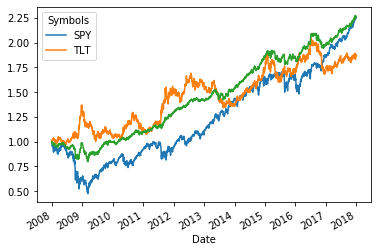

In [16]:
fig,ax = plt.subplots()
(data/data.iloc[0]).plot(ax=ax)
stategy.plot(ax=ax)